<a href="https://colab.research.google.com/github/RutuKaravadra/handson-ml2/blob/master/Comp4630_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name(s): Rutu Karavadra, Timothy, Emily

# Instructions



**Model Training** - The purpose of this assignment is to apply your knowledge of machine learning to **two** different datasets. For each dataset, you will train **at least two** algorithms to achieve a reasonable performance. You may use trial and error process or search strategies (Grid, Randomized) to fine-tune your algorithms. If you are making any choice or trade-off, briefly document it in your code. Documentations should be added as a text cell to your notebook.

**Presentation** - From the all algorithms you use as a blackbox for your assignment, pick **one** algorithm, and study it in detail. The goal here is to understand how this algorithm works behind the scene. Based on your undrestanding of the algorithm, prepare a set of presentation slides for a 15 min presentation. The time of presentations will be after your submission date.

**Reflection** - Finally, add your contribution statement and self assessment to your notebook. 


## Algorithm to Present
To keep the topic of the presentations (the algorithm of your choice) distinct from others, you can enter the algorithm of your choice in [this shared file](https://docs.google.com/spreadsheets/d/1UXCIFQdzxBL7VbhmJEQH8tNv_MewQ_sTQlRWh6ZWUWY/edit?usp=sharing) so others know which algorithms are already chosen for presentation. There is a list of suggested algorithms that you can choose from. Most of the suggested algorithms have a classifier and also a regressor variation, e.g., we have a Decision Tree Classifier and a Decision Tree Regressor. Your presentation can be based on the classifier or regressor algorithm.

## Teamwork
Students should complete the assignment in groups of 3 people. One submission per group is sufficient.


## Submission
A copy of your notebook and also your presentation files should be submitted through your course website. All of your code and documentation should be included in the Colab notebook; additional documentation is not required. Make sure to incude all necessary library installations and imports in your notebook. The submitted assignments will be reviewed on Google Colab. You may upload your code to Google Drive and test it on Colab before your submission.

If you use an external resource such as a published paper or a tutorial website as a guide, **cite the resource** by including a link in your Markdown cell.

# Your Response

## EMNIST dataset

The Extended MNIST dataset (EMNIST), like the Fashion MNIST and MNIST datasets that you have been working with, is a set of 28x28 pixel images. EMNIST extends on the characters 0-9 by adding in handwritten uppercase and lowercase letters. In particular, you will be working with the Balanced EMNIST dataset, which has a balanced class distribution. 

A total of 47 classes are used to represent the digits 0-9, uppercase letters A-Z, and lowercase letters a-z. Due to ambiguity in handwriting, some of the letter classes (C, I, J, K, L, M, O, P, S, U, V, W, X, Y and Z) are merged so that there is just one class for both upper and lower case.


You can read more about the EMNIST dataset [here](https://arxiv.org/pdf/1702.05373v1.pdf).

### Install and import dependencies

In [34]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

### Download dataset

In [35]:
!pip install -U extra_keras_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Get Data and Pre-process

In [36]:
from extra_keras_datasets import emnist

In [37]:
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((112800, 28, 28), (112800,), (18800, 28, 28), (18800,))

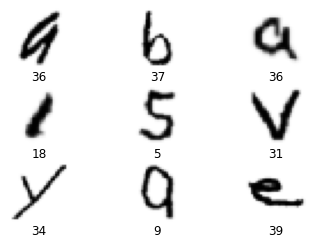

In [38]:
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    ax.axis('off')
    rand_id = np.random.randint(0, X_train.shape[0])
    plt.imshow(X_train[rand_id], cmap='Greys')
    plt.title(y_train[rand_id], y=-0.25)

##Pre-process the Images

Normalizing the image between [0,1]

In [39]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

# Expand to image dimensions to 3 dimenions of 28x28x1
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

X_train.shape


(112800, 28, 28, 1)

In [40]:
#Convert the classes to one hot vector
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


In [41]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28, 28, 1), activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), input_shape = (28, 28, 1), activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(47, activation= "softmax"))

In [42]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [43]:
model.compile(optimizer= 'adam', loss= keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [44]:
# Callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Earlystopping

es = EarlyStopping(monitor= 'val_acc', min_delta= 0.01, patience= 4, verbose= 1)

#Model Checkpoint

mc = ModelCheckpoint("./bestmodel.h5", monitor= "val_acc", verbose= 1, save_best_only = True)

cb = [es,mc]

## Model Training

In [45]:
his = model.fit(X_train, y_train, epochs= 50, validation_split= 0.3)

Epoch 1/50
2468/2468 [==============================] - 62s 25ms/step - loss: 0.8109 - accuracy: 0.7532 - val_loss: 0.5026 - val_accuracy: 0.8387
Epoch 2/50
2468/2468 [==============================] - 53s 22ms/step - loss: 0.5029 - accuracy: 0.8347 - val_loss: 0.4419 - val_accuracy: 0.8510
Epoch 3/50
2468/2468 [==============================] - 50s 20ms/step - loss: 0.4359 - accuracy: 0.8540 - val_loss: 0.4205 - val_accuracy: 0.8562
Epoch 4/50
2468/2468 [==============================] - 50s 20ms/step - loss: 0.3931 - accuracy: 0.8657 - val_loss: 0.3942 - val_accuracy: 0.8636
Epoch 5/50
2468/2468 [==============================] - 51s 21ms/step - loss: 0.3669 - accuracy: 0.8716 - val_loss: 0.3853 - val_accuracy: 0.8643
Epoch 6/50
2468/2468 [==============================] - 50s 20ms/step - loss: 0.3434 - accuracy: 0.8798 - val_loss: 0.3735 - val_accuracy: 0.8699
Epoch 7/50
2468/2468 [==============================] - 51s 21ms/step - loss: 0.3250 - accuracy: 0.8832 - val_loss: 0.3790 -

## Wine Quality dataset

The [Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality) dataset consists of a set of 11 input parameters (acidity, sugar content, alcohol level, etc) and a single output ("quality" as assessed by expert tasters). The white wine dataset, with a total of 4898 samples, is selected for this problem.

While the wine quality dataset is smaller with fewer inputs than the MNIST datasets, there are a number of challenges to overcome:
- Not all inputs are necessarily relevant, and some may be correlated. Part of your experimentation should be determining which inputs to use.
- The dataset is not pre-split into test/train/validation sets.
- The input parameters are not on the same scale, so they require preprocessing.
- The output classes are unbalanced. You will have to address this through appropriate choice of loss metric or resampling.
- The output can be treated as either a regression problem (predict a continuous value from 0 to 9) or as a classification problem. 

## Import Dependencies and Librares

---



In [48]:
import sys
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

## Load Dataset and Understanding Data Structure

In [46]:
white_wine_csv = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
wine_data = pd.read_csv(white_wine_csv, sep=';')

# Inspect the dataset
wine_data.info()
wine_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Note that the wine quality dataset is **unbalanced**, with many more samples in the "medium" quality categories than at the extremes.

## Data Analysis

Descriptive statistics and summary of each column

In [51]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


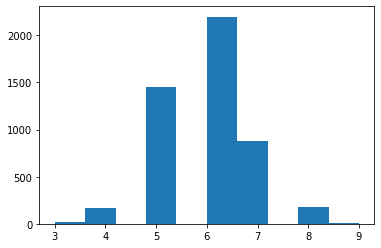

In [47]:
plt.hist(wine_data['quality'], bins=10)
plt.show()

Count the null values on each column to see if there are rows that needs to be replaced or removed

In [52]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Compute the pairwise correlation between the columns to get a better understanding which columns are relevant

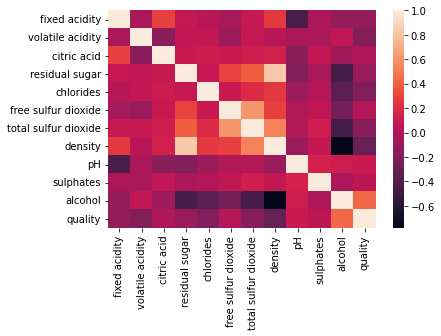

In [53]:
corr = wine_data.corr()
sns.heatmap(corr)

Count the occurance of each value in the quality column

In [54]:
wine_data.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

The previous line of code gave us an insight that the column for quality is in the range of 3-9. With 6 as the most reoccuring value and 9 with the least. Now we can check the mean of each column for each value on the column.

In [56]:
wine_data.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


## Data Visualization

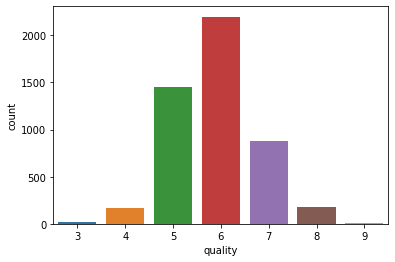

In [55]:
import matplotlib.pyplot as plt

sns.countplot(x='quality', data=wine_data)

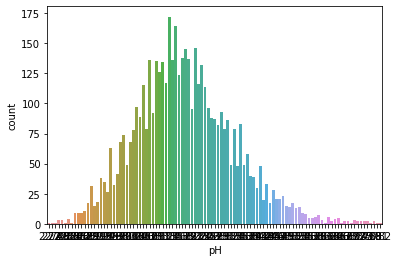

In [57]:
sns.countplot(x='pH', data=wine_data)

## Reflection

**Contribution statement**: Briefly explain the contribution of each member to the assignment.



**Self assessment**: In your opinion, what are the deficiencies in your work that need to be improved?

# Marking Rubric



The following table provides a summary of how your assignment will be marked. Your results will not be ranked against each other; what counts is reasonable choices and description of your thought processes.

<table>
<tr>
<th>Item</th>
<th>Points</th>
</tr>

<tr>
<td>The training process for dataset 1</td>
<td>20</td>
</tr>

<tr>
<td>The training process for dataset 2</td>
<td>20</td>
</tr>

<tr>
<td>Documentation of the process and choices made </td>
<td>20</td>
</tr>

<tr>
<td>Overall code quality</td>
<td>5</td>
</tr>

<tr>
<td>Presentation</td>
<td>30</td>
</tr>

<tr>
<td>Reflection</td>
<td>5</td>
</tr>


<tr>
<td><b>Total:</b></td>
<td><b>100</b></td>
</tr>

</table>